Example1

In [2]:
process_var = 1. # variance in the dog's movement
sensor_var = 2. # variance in the sensor measurement
velocity = 1. # m/s
dt = 1. # time step in seconds

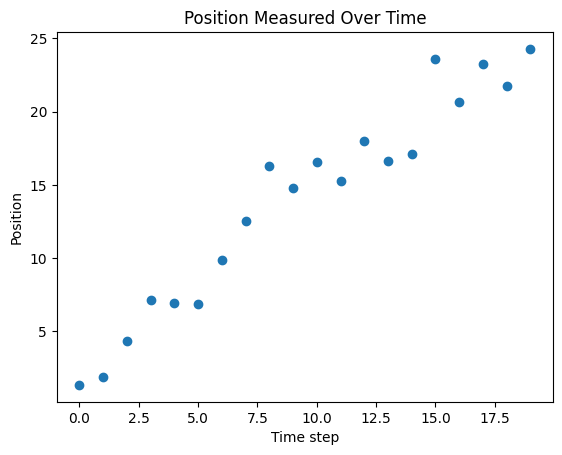

In [3]:
zs = [1.3535959735108178, 1.8820653967131618, 4.341047429453569, 7.156332673205118, 6.938695089418526,
 6.843912342028484, 9.846824080052299, 12.553482049375292, 16.2730841073834, 14.800411177015299,
 16.53802277090776, 15.269434886383538, 17.998112285019232, 16.629295487587115, 17.1377679268381,
 23.589489061545798, 20.65006487184912, 23.236590145275883, 21.766974549446164, 24.28564376387599]

import matplotlib.pyplot as plt

# plt.plot(zs)
plt.xlabel('Time step')
plt.ylabel('Position')
plt.scatter(range(len(zs)), zs)
plt.title('Position Measured Over Time')
plt.show()

In [5]:
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])

process_var = 1. # variance in the dog's movement
sensor_var = 2. # variance in the sensor measurement
velocity = 1. # m/s
dt = 1. # time step in seconds
process_model = gaussian(velocity*dt, process_var) # displacement to add to x

def predict(pos, movement):
    return gaussian(pos + movement, pos.var + movement.var)

def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

def update(prior, likelihood):
    posterior = gaussian_multiply(likelihood, prior)
    return posterior

Example2

In [14]:
import numpy as np

#  simulate the temperature sensor measurement 
def volt(voltage, std):
    return voltage + (np.random.randn() * std)

N = 50

voltage_std = .13
process_var = .05**2
actual_voltage = 16.3

temp_change = 0.
x = gaussian(30, 2000)

process_model = gaussian(temp_change, process_var)
zs = [volt(actual_voltage, voltage_std)  for i in range(N)]

In [15]:
def predict(pos, movement):
    return gaussian(pos.mean + movement.mean, pos.var + movement.var)

def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

def update(prior, likelihood):
    posterior = gaussian_multiply(likelihood, prior)
    return posterior

In [16]:
xs, priors = np.zeros((N, 2)), np.zeros((N, 2))

for i, z in enumerate(zs):
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, sensor_var))
    priors[i] = prior
    xs[i] = x

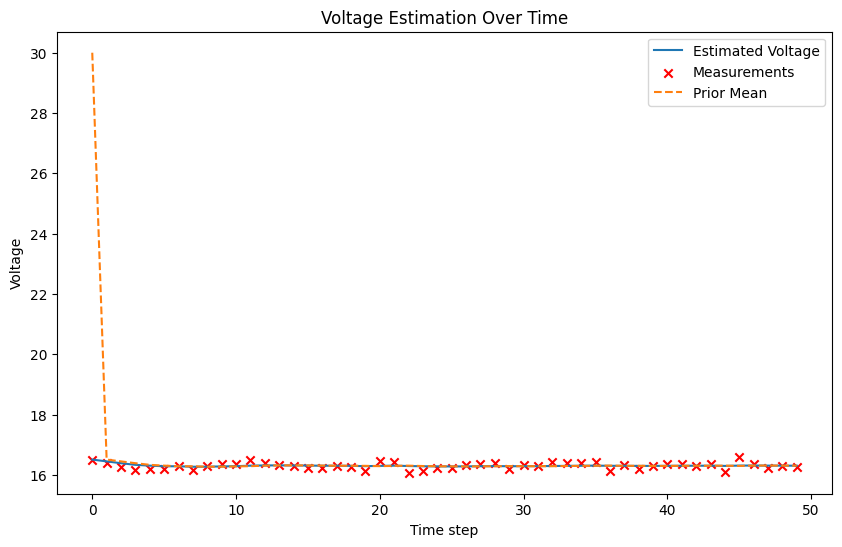

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(xs[:, 0], label='Estimated Voltage')
plt.scatter(range(N), zs, c='r', label='Measurements', marker='x')
plt.plot(priors[:, 0], label='Prior Mean', linestyle='--')
plt.xlabel('Time step')
plt.ylabel('Voltage')
plt.title('Voltage Estimation Over Time')
plt.legend()
plt.show()